# Description

This project involves constructing a model to assess the feasibility of installing a battery for solar electricity generation. The model performs various calculations and checks, including data completeness verification, outlier investigation, hourly electricity requirements, cumulative battery charge modeling, savings calculation, and long-term projections. The project's background outlines Naomi's current electricity setup, her considerations for a battery, and the provided dataset for analysis, emphasizing hourly data for 2020. The goal is to determine the additional electricity met by the solar panel-battery combination, associated cost savings, NPV, and IRR for two scenarios considering future electricity price changes.

In [1]:
# To start working with the dataset, we will import the following libraries

import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for basic data visualization
import seaborn as sns  # Seaborn for advanced data visualization
import warnings  # Warnings to suppress unnecessary warnings
warnings.filterwarnings("ignore")

## Loading the date into our environment

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from tkinter import Tk, filedialog
import pandas as pd

def select_file(b):
    clear_output()
    root = Tk()
    root.withdraw()  # Hide the main window
    root.call('wm', 'attributes', '.', '-topmost', True)  # Raise the root to the top of all windows
    b.files = filedialog.askopenfilename(multiple=False)  # List of selected files
    path = b.files
    global df
    df = pd.read_excel(path)
    print(f'Loaded dataframe from {path}')
    display(df.head())

fileselect = widgets.Button(description="File select")
fileselect.on_click(select_file)

display(fileselect)

Loaded dataframe from F:/Projects/Electricity_Project/Electricity_generation_and_usage.xlsx


,Hour,Date & Time,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


## Understanding the Data

In [4]:
df.dtypes

Hour                                           int64
Date & Time                           datetime64[ns]
Solar electricity generation (kWh)           float64
Electricity usage (kWh)                      float64
dtype: object

- We can see there are three formats of data types:

  - **datetime64:** Date and Time variables in our dataset.

  - **int64:** It represents the integer variables i.e: Hour of the day.

  - **float64:** It represents the variables that have some decimal values involved. They are also numerical variables.

- Numerical variables in our dataset are: Electricity usage and Solar electricity generation.


In [5]:
df.shape

(8760, 4)

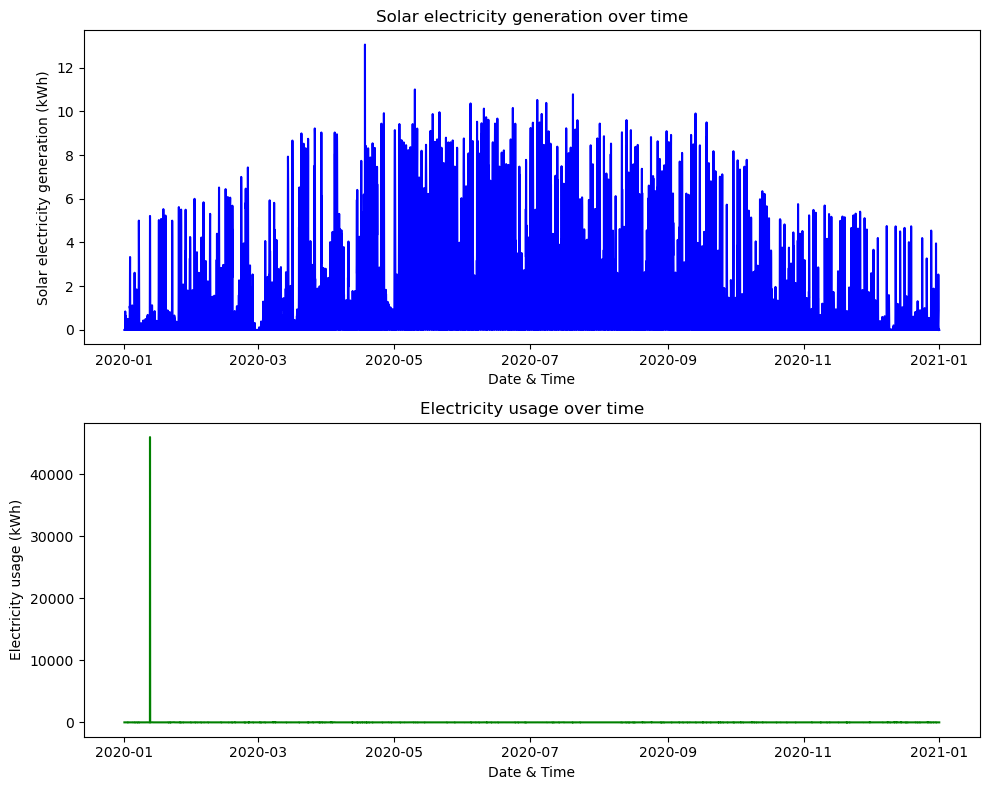

In [6]:
# Convert 'Date & Time' to datetime format if it's not already
df['Date & Time'] = pd.to_datetime(df['Date & Time'])

# Set 'Date & Time' as the index of the DataFrame
df.set_index('Date & Time', inplace=True)

# Create line plots for time-series data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.lineplot(data=df['Solar electricity generation (kWh)'], ax=axes[0], color='blue')
axes[0].set_title('Solar electricity generation over time')
axes[0].set_ylabel('Solar electricity generation (kWh)')

sns.lineplot(data=df['Electricity usage (kWh)'], ax=axes[1], color='green')
axes[1].set_title('Electricity usage over time')
axes[1].set_ylabel('Electricity usage (kWh)')

plt.tight_layout()
plt.show()

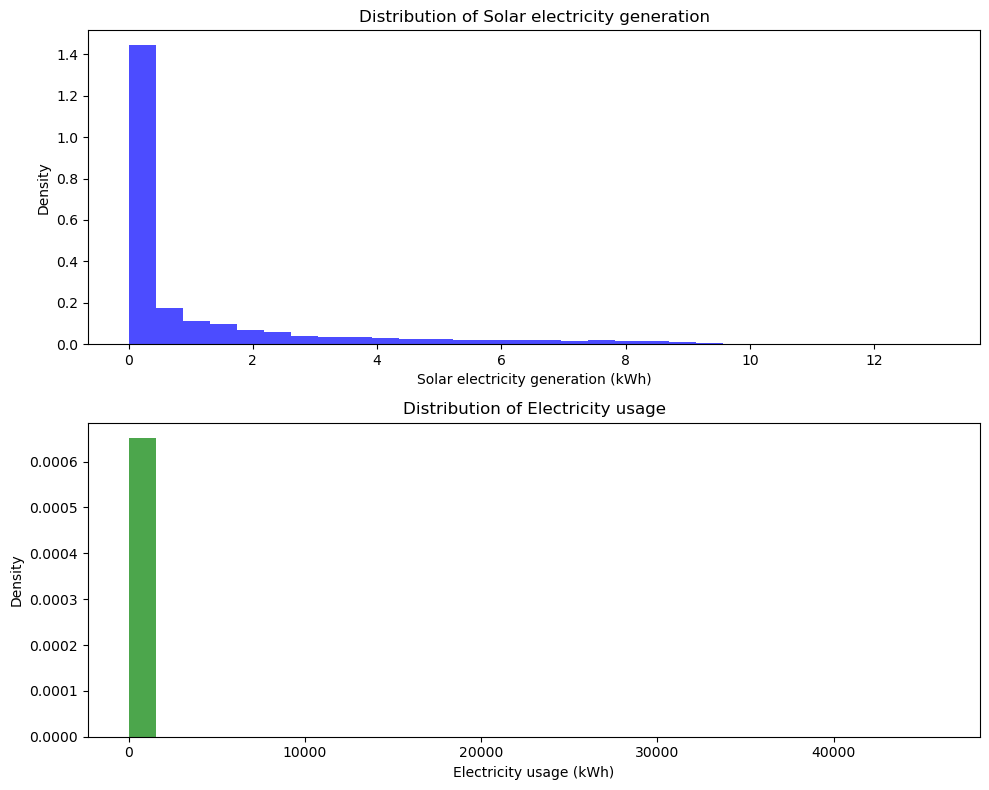

In [7]:
# Create histograms for distribution of continuous data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Histogram for Solar electricity generation
axes[0].hist(df['Solar electricity generation (kWh)'], bins=30, color='blue', alpha=0.7, density=True)
axes[0].set_title('Distribution of Solar electricity generation')
axes[0].set_xlabel('Solar electricity generation (kWh)')
axes[0].set_ylabel('Density')

# Histogram for Electricity usage
axes[1].hist(df['Electricity usage (kWh)'], bins=30, color='green', alpha=0.7, density=True)
axes[1].set_title('Distribution of Electricity usage')
axes[1].set_xlabel('Electricity usage (kWh)')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Modelling steps and data checks

In [8]:
# Check if there are any missing values in the DataFrame
if df.isnull().sum().any():
    print("There are missing values in the DataFrame. Please handle them before proceeding.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


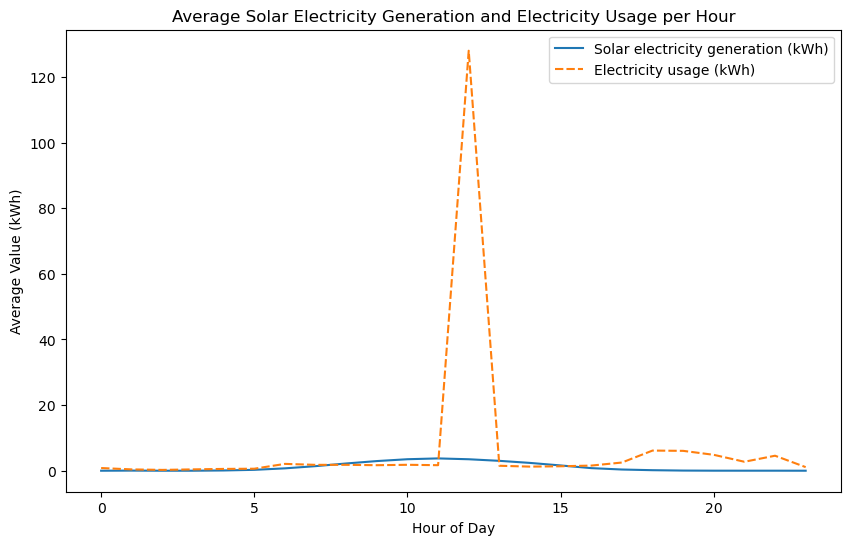

In [9]:
# Creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day

# Ensure 'Date & Time' is in datetime format (if it's not already)
df.index = pd.to_datetime(df.index)

# Extract hour from the index
df['Hour_of_day'] = df.index.hour

# Calculate average solar electricity generation and average electricity usage for each hour
average_df = df.groupby('Hour_of_day')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].mean()

# Plotting the averages
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_df)
plt.title('Average Solar Electricity Generation and Electricity Usage per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value (kWh)')
plt.show()

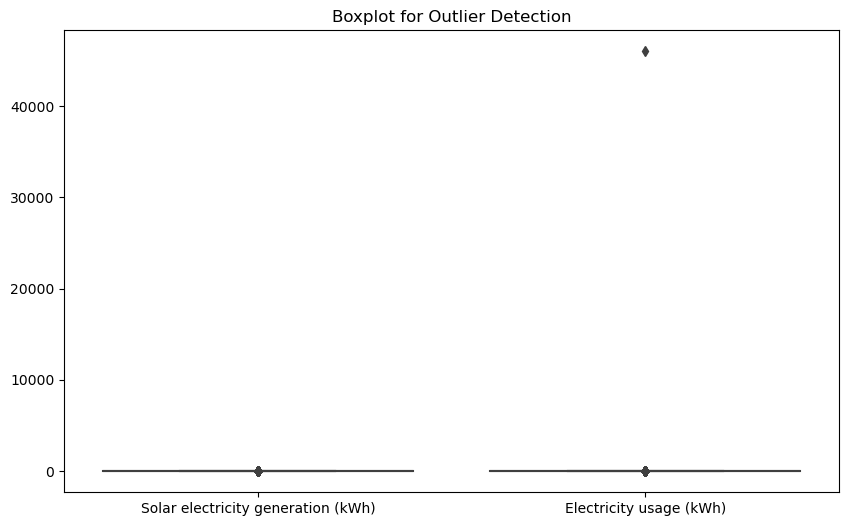

In [10]:
# Investigating any significant outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [11]:
# Calculating, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider.

# Filter data for the year 2020
df_2020 = df[df.index.year == 2020]

# Calculate the amount of electricity that needed to be bought
df_2020['Electricity_bought (kWh)'] = df_2020['Electricity usage (kWh)'] - df_2020['Solar electricity generation (kWh)']

# Set negative values to zero
df_2020['Electricity_bought (kWh)'] = df_2020['Electricity_bought (kWh)'].clip(lower=0)

# Display the DataFrame
print(df_2020)

                     Hour  Solar electricity generation (kWh)  \
Date & Time                                                     
2020-01-01 00:00:00     0                               0.000   
2020-01-01 01:00:00     1                               0.000   
2020-01-01 02:00:00     2                               0.000   
2020-01-01 03:00:00     3                               0.000   
2020-01-01 04:00:00     4                               0.000   
...                   ...                                 ...   
2020-12-31 19:00:00    19                               0.012   
2020-12-31 20:00:00    20                               0.003   
2020-12-31 21:00:00    21                               0.000   
2020-12-31 22:00:00    22                               0.015   
2020-12-31 23:00:00    23                               0.000   

                     Electricity usage (kWh)  Hour_of_day  \
Date & Time                                                 
2020-01-01 00:00:00             

In [12]:
# Calculating for each hour in 2020, the excess solar electricity generated over electricity used. 

# Calculate the excess solar electricity generated
df_2020['Excess_electricity (kWh)'] = df_2020['Solar electricity generation (kWh)'] - df_2020['Electricity usage (kWh)']

# Set negative values to zero
df_2020['Excess_electricity (kWh)'] = df_2020['Excess_electricity (kWh)'].clip(lower=0)

# Display the DataFrame
print(df_2020)

                     Hour  Solar electricity generation (kWh)  \
Date & Time                                                     
2020-01-01 00:00:00     0                               0.000   
2020-01-01 01:00:00     1                               0.000   
2020-01-01 02:00:00     2                               0.000   
2020-01-01 03:00:00     3                               0.000   
2020-01-01 04:00:00     4                               0.000   
...                   ...                                 ...   
2020-12-31 19:00:00    19                               0.012   
2020-12-31 20:00:00    20                               0.003   
2020-12-31 21:00:00    21                               0.000   
2020-12-31 22:00:00    22                               0.015   
2020-12-31 23:00:00    23                               0.000   

                     Electricity usage (kWh)  Hour_of_day  \
Date & Time                                                 
2020-01-01 00:00:00             

In [13]:
# Modeling the cumulative battery charge level (measured in kWh) for each hour over 2020,
# assuming a battery had already been installed.

# Initialize the battery charge level
df_2020['Battery_charge_level (kWh)'] = 0

# Maximum battery charge level (replace with actual value)
max_battery_level = 100

# Calculate the battery charge level for each hour
for i in range(1, len(df_2020)):
    # Increase in battery charge level due to excess solar electricity generated
    increase = df_2020.iloc[i]['Excess_electricity (kWh)']
    
    # Decrease in battery charge level due to electricity bought
    decrease = df_2020.iloc[i]['Electricity_bought (kWh)']
    
    # Update the battery charge level
    df_2020.iloc[i, df_2020.columns.get_loc('Battery_charge_level (kWh)')] = df_2020.iloc[i-1]['Battery_charge_level (kWh)'] + increase - decrease
    
    # Ensure the battery charge level does not exceed the maximum battery charge level
    if df_2020.iloc[i]['Battery_charge_level (kWh)'] > max_battery_level:
        df_2020.iloc[i, df_2020.columns.get_loc('Battery_charge_level (kWh)')] = max_battery_level
    
    # Ensure the battery charge level does not drop below zero
    if df_2020.iloc[i]['Battery_charge_level (kWh)'] < 0:
        df_2020.iloc[i, df_2020.columns.get_loc('Battery_charge_level (kWh)')] = 0

# Display the DataFrame
print(df_2020)

                     Hour  Solar electricity generation (kWh)  \
Date & Time                                                     
2020-01-01 00:00:00     0                               0.000   
2020-01-01 01:00:00     1                               0.000   
2020-01-01 02:00:00     2                               0.000   
2020-01-01 03:00:00     3                               0.000   
2020-01-01 04:00:00     4                               0.000   
...                   ...                                 ...   
2020-12-31 19:00:00    19                               0.012   
2020-12-31 20:00:00    20                               0.003   
2020-12-31 21:00:00    21                               0.000   
2020-12-31 22:00:00    22                               0.015   
2020-12-31 23:00:00    23                               0.000   

                     Electricity usage (kWh)  Hour_of_day  \
Date & Time                                                 
2020-01-01 00:00:00             

In [14]:
# Calculating the amount of electricity for each hour in 2020 that would have been bought from the electricity 
# provider, assuming a battery had already been installed.

# Initialize the amount of electricity bought from the provider
df_2020['Electricity_bought_with_battery (kWh)'] = 0

# Calculate the amount of electricity bought from the provider for each hour
for i in range(len(df_2020)):
    # Electricity needed is the difference between usage and generation
    needed = df_2020.iloc[i]['Electricity usage (kWh)'] - df_2020.iloc[i]['Solar electricity generation (kWh)']
    
    # If the battery charge level is less than the electricity needed
    if df_2020.iloc[i]['Battery_charge_level (kWh)'] < needed:
        # The amount bought is the difference between the electricity needed and the battery charge level
        df_2020.iloc[i, df_2020.columns.get_loc('Electricity_bought_with_battery (kWh)')] = needed - df_2020.iloc[i]['Battery_charge_level (kWh)']
        # The battery charge level is depleted
        df_2020.iloc[i, df_2020.columns.get_loc('Battery_charge_level (kWh)')] = 0
    else:
        # The battery charge level is reduced by the electricity needed
        df_2020.iloc[i, df_2020.columns.get_loc('Battery_charge_level (kWh)')] -= needed

# Display the DataFrame
print(df_2020)

                     Hour  Solar electricity generation (kWh)  \
Date & Time                                                     
2020-01-01 00:00:00     0                               0.000   
2020-01-01 01:00:00     1                               0.000   
2020-01-01 02:00:00     2                               0.000   
2020-01-01 03:00:00     3                               0.000   
2020-01-01 04:00:00     4                               0.000   
...                   ...                                 ...   
2020-12-31 19:00:00    19                               0.012   
2020-12-31 20:00:00    20                               0.003   
2020-12-31 21:00:00    21                               0.000   
2020-12-31 22:00:00    22                               0.015   
2020-12-31 23:00:00    23                               0.000   

                     Electricity usage (kWh)  Hour_of_day  \
Date & Time                                                 
2020-01-01 00:00:00             

In [15]:
# Calculating the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting) 
# from installing a battery compared to using the existing solar panels alone.

# Cost of electricity per kWh
electricity_cost = 0.17 # in dollars

# Calculate the total cost of electricity bought from the provider without a battery
total_cost_without_battery = df_2020['Electricity_bought (kWh)'].sum() * electricity_cost

# Calculate the total cost of electricity bought from the provider with a battery
total_cost_with_battery = df_2020['Electricity_bought_with_battery (kWh)'].sum() * electricity_cost

# Calculate the savings from installing a battery
savings = total_cost_without_battery - total_cost_with_battery

print(f'The savings from installing a battery in 2020 would be ${savings:.2f}.')

The savings from installing a battery in 2020 would be $787.90.


             Solar electricity generation (kWh)  Electricity usage (kWh)  \
Date & Time                                                                
2020-01-31                              266.259             47705.180181   
2020-02-29                              449.634              1557.578810   
2020-03-31                              602.451              1797.859450   
2020-04-30                              915.132              1726.356487   
2020-05-31                             1641.360               943.803809   
2020-06-30                             1408.287              1158.995538   
2020-07-31                             1371.465              1196.957121   
2020-08-31                             1158.639              1491.525351   
2020-09-30                              835.680              1620.714165   
2020-10-31                              546.132              1420.745585   
2020-11-30                              381.723              1479.005869   
2020-12-31  

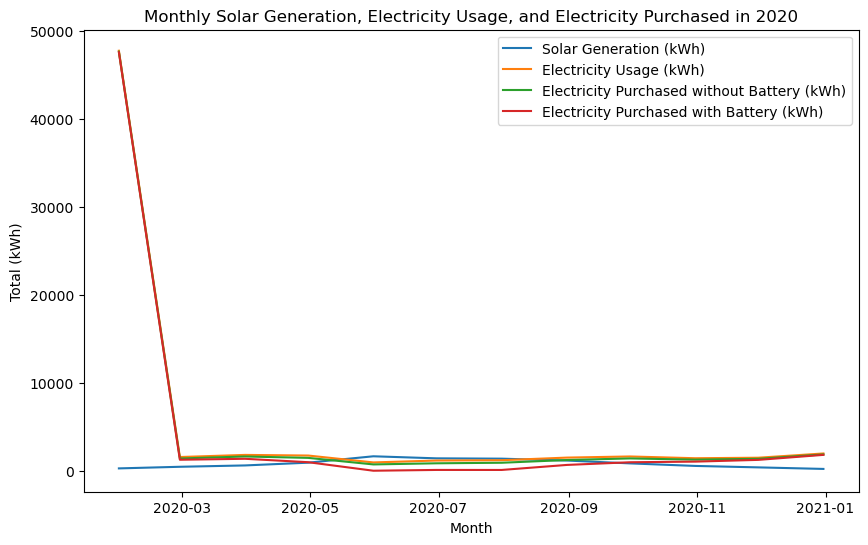

In [16]:
# Tabulating the data appropriately and then producing a chart to illustrate, 
# on a monthly basis for the calendar year and measured in kWh.


# Resample the data on a monthly basis
monthly_data = df_2020.resample('M').sum()

# Tabulate the data
print(monthly_data[['Solar electricity generation (kWh)', 'Electricity usage (kWh)', 'Electricity_bought (kWh)', 'Electricity_bought_with_battery (kWh)']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Solar electricity generation (kWh)'], label='Solar Generation (kWh)')
plt.plot(monthly_data.index, monthly_data['Electricity usage (kWh)'], label='Electricity Usage (kWh)')
plt.plot(monthly_data.index, monthly_data['Electricity_bought (kWh)'], label='Electricity Purchased without Battery (kWh)')
plt.plot(monthly_data.index, monthly_data['Electricity_bought_with_battery (kWh)'], label='Electricity Purchased with Battery (kWh)')
plt.xlabel('Month')
plt.ylabel('Total (kWh)')
plt.title('Monthly Solar Generation, Electricity Usage, and Electricity Purchased in 2020')
plt.legend()
plt.show()

In [18]:
# Project forward for 20 years from 1 January 2022 the annual savings from installing the battery 
# for two scenarios: Electricity prices increase as expected by the government, 4% p.a and 
# Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a



import numpy_financial as npf

# Discount rate
discount_rate = 0.06

# Number of years
years = 20

# Initial electricity cost per kWh
initial_cost = 0.17  # in dollars
savings =  787.90 # in dollars

# Scenario 1: Electricity prices increase by 4% p.a.
annual_savings_1 = [savings * (initial_cost * (1 + 0.04) ** year) for year in range(years)]
npv_1 = npf.npv(discount_rate, annual_savings_1)

# Scenario 2: Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a.
annual_savings_2 = [savings * initial_cost * (1 + 0.04 + 0.0025 * year) ** year for year in range(years)]
npv_2 = npf.npv(discount_rate, annual_savings_2)

print(f'The NPV of the future annual savings for scenario 1 is ${npv_1:.2f}.')
print(f'The NPV of the future annual savings for scenario 2 is ${npv_2:.2f}.')

The NPV of the future annual savings for scenario 1 is $2248.94.
The NPV of the future annual savings for scenario 2 is $3035.13.


In [19]:
# Calculating the Internal Rate of Return (IRR) for the two scenarios above 
# by determining the discount rate that equates the net present value of the future 
# annual savings to the initial cost of the battery for each scenario.



# Initial cost of battery
initial_cost_of_battery = 7000 

# Scenario 1
cash_flows_1 = [-initial_cost_of_battery] + annual_savings_1
irr_1 = npf.irr(cash_flows_1)

# Scenario 2
cash_flows_2 = [-initial_cost_of_battery] + annual_savings_2
irr_2 = npf.irr(cash_flows_2)

print(f'The IRR for scenario 1 is {irr_1:.2%}.')
print(f'The IRR for scenario 2 is {irr_2:.2%}.')

The IRR for scenario 1 is -4.40%.
The IRR for scenario 2 is -1.27%.


In [22]:
from numpy_financial import npv, irr

# Calculate the extra electricity met by the solar panel and battery combination
df['Extra_Electricity'] = np.maximum(0, df['Solar electricity generation (kWh)'] - 12.5)

# Calculate the implied dollar savings
df['Implied_Savings'] = df['Extra_Electricity'] * 0.17  # Assuming $0.17 per kWh

# Calculate electricity price with inflation
df['Electricity_Price'] = 0.17 * (1 + 0.04)**(df.index.year - 2020)  # Scenario 1

# For Scenario 2
# df['Electricity_Price'] = 0.17 * (1 + 0.0425)**(df.index.year - 2020)

# Calculate the NPV of the battery investment using a discount rate of 6% p.a.
discount_rate = 0.06
cash_flows = [-7000] + df['Implied_Savings'].tolist()
df['NPV'] = npv(discount_rate, cash_flows)

# Calculate the IRR
df['IRR'] = irr(cash_flows)

# Display the resulting DataFrame
print(df[['Extra_Electricity', 'Implied_Savings', 'Electricity_Price', 'NPV', 'IRR']])


                     Extra_Electricity  Implied_Savings  Electricity_Price  \
Date & Time                                                                  
2020-01-01 00:00:00                0.0              0.0               0.17   
2020-01-01 01:00:00                0.0              0.0               0.17   
2020-01-01 02:00:00                0.0              0.0               0.17   
2020-01-01 03:00:00                0.0              0.0               0.17   
2020-01-01 04:00:00                0.0              0.0               0.17   
...                                ...              ...                ...   
2020-12-31 19:00:00                0.0              0.0               0.17   
2020-12-31 20:00:00                0.0              0.0               0.17   
2020-12-31 21:00:00                0.0              0.0               0.17   
2020-12-31 22:00:00                0.0              0.0               0.17   
2020-12-31 23:00:00                0.0              0.0         